## Introduction:
**SOFR** (Secured Overnight Financing Rate) is the overnight reference rate announced by the FED, using the weighted median prices of overnight repo transactions collateralized by the US treasury bonds. The goal of the project was to fit a 3-state Markov regime-switching model to the SOFR time series and compare different models under various assumptions (constant/different mu and sigma).
We fitted four models: a baseline 3-state model, a model with constant variance, a model with constant mean, and a reduced-state model.

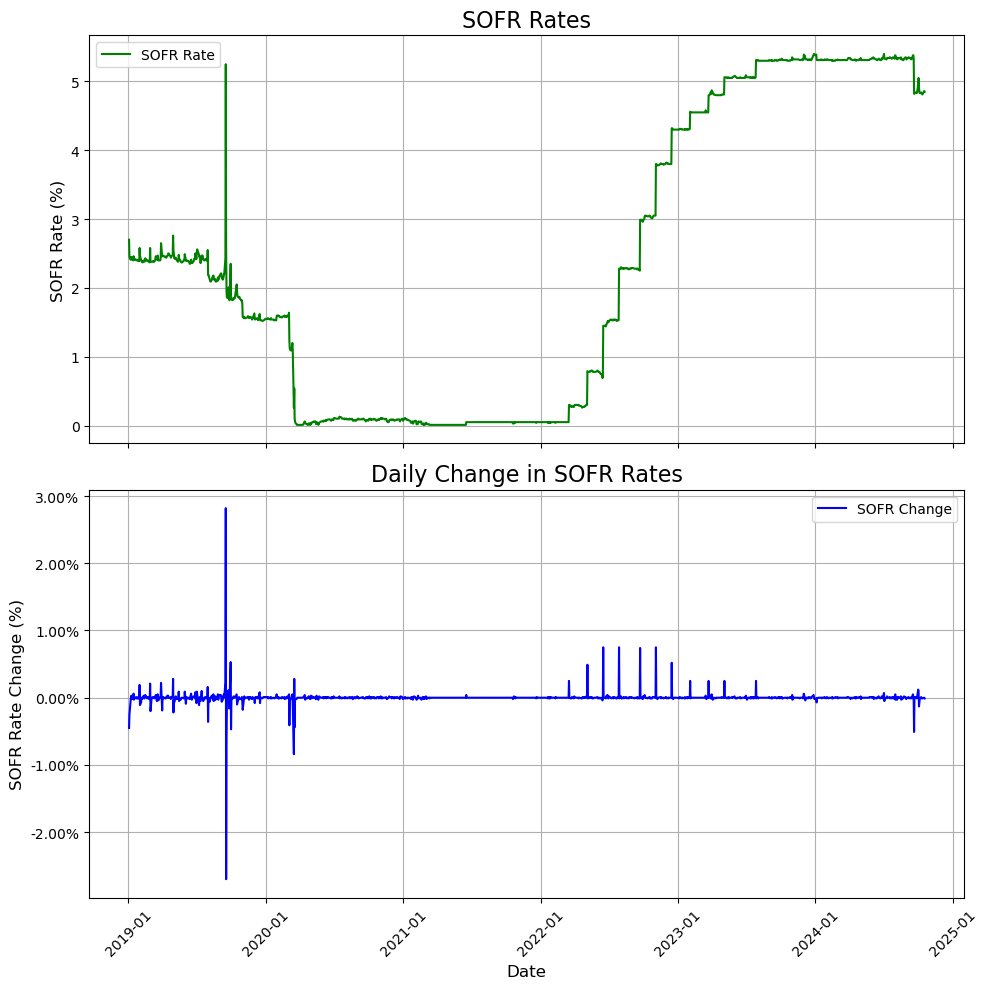

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Read the CSV file
df = pd.read_csv('./SOFR.csv')

# Clean the SOFR column and calculate changes
df['SOFR'] = df['SOFR'].replace('.', np.nan)  # Replace '.' with NaN
df['SOFR'] = pd.to_numeric(df['SOFR'], errors='coerce')  # Convert to numeric
df['SOFR_change'] = df['SOFR'].diff()  # Calculate daily SOFR rate change

# Set the date as index and drop rows with NaN values
df.set_index('Date', inplace=True)
df.dropna(inplace=True)

# Convert the index to datetime format for easier handling of date ticks
df.index = pd.to_datetime(df.index)

# Function to format the y-axis labels as percentages
def percent_formatter(x, pos):
    return f'{x:.2f}%'

# Create the figure and axes for subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# First plot: SOFR rates
ax1.plot(df['SOFR'], label='SOFR Rate', color='green')
ax1.set_title('SOFR Rates', fontsize=16)
ax1.set_ylabel('SOFR Rate (%)', fontsize=12)
ax1.grid(True)
ax1.legend()

# Second plot: SOFR rate changes (diff)
ax2.plot(df['SOFR_change'], label='SOFR Change', color='blue')
ax2.set_title('Daily Change in SOFR Rates', fontsize=16)
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('SOFR Rate Change (%)', fontsize=12)

# Apply the percentage formatter to the y-axis for the second plot
ax2.yaxis.set_major_formatter(FuncFormatter(percent_formatter))
ax2.grid(True)
ax2.legend()

# Set x-axis major ticks to show years and rotate for better readability
ax2.xaxis.set_major_locator(mdates.YearLocator())  # Set ticks at years
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Year-Month format
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


Visually, SOFR time series shows 3 regimes which can be summarized as :

* **Neutral regime** (Jan 2019 - Mar 2020): This regime is characterized by neutral interest rate policy by FED.

* **ZIRP regime** (Mar 2020 - Jan 2022): This regime is characterized by the dovish zero interest rate policy by FED, to further stimulate economic growth and spending.

* **Hawkish regime** (Jan 2022 - Jan 2024): This regime is characterized by the hawkish increasing interest rates policy by FED, to prevent inflation and reduce spending.

With this visualization, we can also clearly see the US repo crisis in September 2019.

https://en.wikipedia.org/wiki/September_2019_events_in_the_U.S._repo_market

Based on our visual analysis, we proceed by fitting various Markov regime-switching models to more accurately capture the underlying dynamics of the data.

c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime

Model 1: 3-state regime-switching model (best-fit)
                        Markov Switching Model Results                        
Dep. Variable:                   SOFR   No. Observations:                 1385
Model:               MarkovRegression   Log Likelihood                 295.506
Date:                Sun, 20 Oct 2024   AIC                           -567.011
Time:                        14:56:47   BIC                           -504.210
Sample:                             0   HQIC                          -543.522
                               - 1385                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0533      0.001     40.337      0.000       0.051       0.056
s

c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model 2: Same sigma, different mu (constant variance, switching mean)
                        Markov Switching Model Results                        
Dep. Variable:                   SOFR   No. Observations:                 1385
Model:               MarkovRegression   Log Likelihood                -600.309
Date:                Sun, 20 Oct 2024   AIC                           1220.618
Time:                        14:56:49   BIC                           1272.953
Sample:                             0   HQIC                          1240.192
                               - 1385                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1127      0.017      6.772      0.000       

c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'
c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\regime_switching\markov_switching.py:1291: EstimationWarning: Invalid regime transition probabilities estimated in EM iteration; probabilities have been re-scaled to continue estimation.
  warnings.warn('Invalid regime transition probabilities'


Model 3: Same mu, different sigma (same mean, switching variance)
                        Markov Switching Model Results                        
Dep. Variable:                   SOFR   No. Observations:                 1385
Model:               MarkovRegression   Log Likelihood               -2601.815
Date:                Sun, 20 Oct 2024   AIC                           5223.631
Time:                        14:56:51   BIC                           5275.966
Sample:                             0   HQIC                          5243.205
                               - 1385                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1473      0.012     12.430      0.000       0.12

c:\Users\Atakan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model 4: Same mu and sigma, different number of states (2-state regime-switching)
                        Markov Switching Model Results                        
Dep. Variable:                   SOFR   No. Observations:                 1385
Model:               MarkovRegression   Log Likelihood               -1809.244
Date:                Sun, 20 Oct 2024   AIC                           3628.489
Time:                        14:56:51   BIC                           3654.656
Sample:                             0   HQIC                          3638.276
                               - 1385                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8780      0.030     28.955      

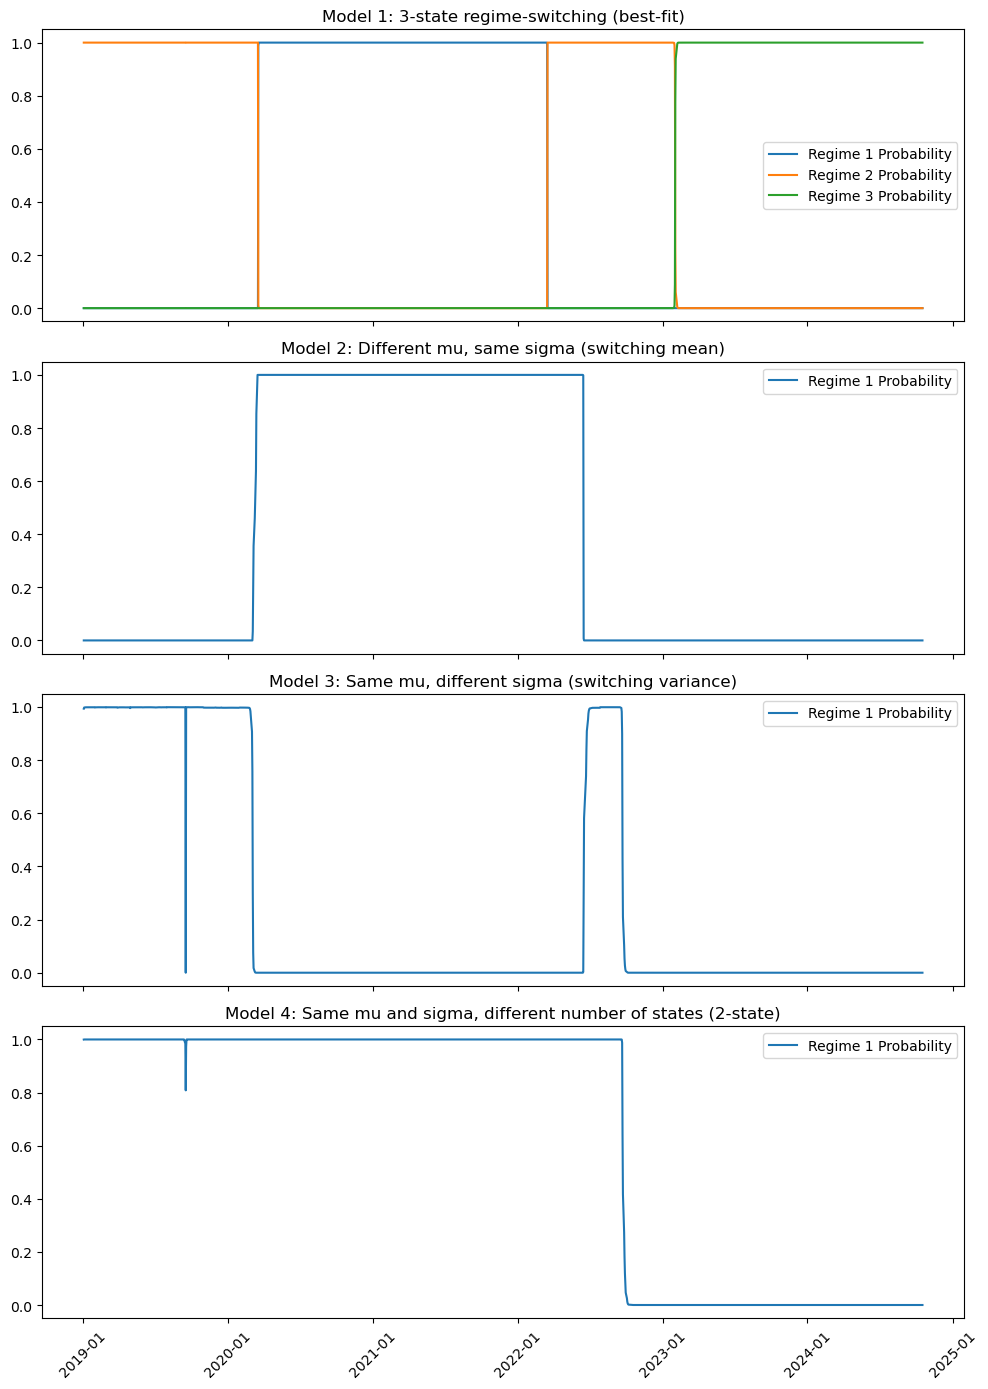

In [11]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

# Model 1: 3-state regime-switching model (best-fit)
model_3_states = MarkovRegression(df['SOFR'], k_regimes=3, trend='c', switching_variance=True)
result_3_states = model_3_states.fit()

print("Model 1: 3-state regime-switching model (best-fit)")
print(result_3_states.summary())

# Calculate mean (mu) and standard deviation (sigma)
mu_3_states = result_3_states.params.filter(like='intercept')
sigma_3_states = np.sqrt(result_3_states.cov_params().values.diagonal()[-3:])  # Last 3 parameters are for variances

print(f"Estimated mu (means): {mu_3_states}")
print(f"Estimated sigma (std deviations): {sigma_3_states}")

# Model 2: Same sigma, different mu (same variance, switching mean)
model_diff_mu_same_sigma = MarkovRegression(df['SOFR'], k_regimes=3, trend='c', switching_variance=False)
result_diff_mu_same_sigma = model_diff_mu_same_sigma.fit()

print("Model 2: Same sigma, different mu (constant variance, switching mean)")
print(result_diff_mu_same_sigma.summary())

# Model 3: Same mu, different sigma (same mean, switching variance)
model_same_mu_diff_sigma = MarkovRegression(df['SOFR'], k_regimes=3, trend='c', switching_variance=True, switching_trend=False)
result_same_mu_diff_sigma = model_same_mu_diff_sigma.fit()

print("Model 3: Same mu, different sigma (same mean, switching variance)")
print(result_same_mu_diff_sigma.summary())

# Model 4: Same mu and sigma, different number of states (e.g. 2 states)
model_2_states_same_mu_sigma = MarkovRegression(df['SOFR'], k_regimes=2, trend='c', switching_variance=False)
result_2_states_same_mu_sigma = model_2_states_same_mu_sigma.fit()

print("Model 4: Same mu and sigma, different number of states (2-state regime-switching)")
print(result_2_states_same_mu_sigma.summary())

# Ranking the models using Akaike Information Criterion (AIC)
models_aic = {
    '3-state regime-switching (best-fit)': result_3_states.aic,
    'Different mu, same sigma (switching mean)': result_diff_mu_same_sigma.aic,
    'Same mu, different sigma (switching variance)': result_same_mu_diff_sigma.aic,
    'Same mu and sigma, different number of states (2 states)': result_2_states_same_mu_sigma.aic
}

# Sort and rank models by AIC (lower is better)
sorted_models_aic = sorted(models_aic.items(), key=lambda x: x[1])

print("\nModel AIC Rankings (Best to Worst):")
for model_name, aic_value in sorted_models_aic:
    print(f"{model_name}: AIC = {aic_value}")

# Plot the smoothed probabilities of the regimes for each model
fig, axes = plt.subplots(4, 1, figsize=(10, 14), sharex=True)

# Model 1: Plot the smoothed probabilities for the 3-state best-fit model
axes[0].plot(result_3_states.smoothed_marginal_probabilities[0], label="Regime 1 Probability")
axes[0].plot(result_3_states.smoothed_marginal_probabilities[1], label="Regime 2 Probability")
axes[0].plot(result_3_states.smoothed_marginal_probabilities[2], label="Regime 3 Probability")
axes[0].set_title('Model 1: 3-state regime-switching (best-fit)')
axes[0].legend()

# Model 2: Plot the smoothed probabilities for same sigma, different mu
axes[1].plot(result_diff_mu_same_sigma.smoothed_marginal_probabilities[0], label="Regime 1 Probability")
axes[1].set_title('Model 2: Different mu, same sigma (switching mean)')
axes[1].legend()

# Model 3: Plot the smoothed probabilities for same mu, different sigma
axes[2].plot(result_same_mu_diff_sigma.smoothed_marginal_probabilities[0], label="Regime 1 Probability")
axes[2].set_title('Model 3: Same mu, different sigma (switching variance)')
axes[2].legend()

# Model 4: Plot the smoothed probabilities for same mu and sigma, different number of states
axes[3].plot(result_2_states_same_mu_sigma.smoothed_marginal_probabilities[0], label="Regime 1 Probability")
axes[3].set_title('Model 4: Same mu and sigma, different number of states (2-state)')
axes[3].legend()

# Formatting
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.tight_layout()
plt.show()


## Modeling Process:

The best-fit model, our baseline, allowed for both the mean and variance to shift across three distinct regimes. This model was the most flexible and thus provided the best opportunity to detect significant changes in the behavior of the SOFR time series. Given the complexity and variability in the series—particularly during the pandemic period—this flexibility was crucial.

In the second model, we assumed that the variance remained constant, while the expected return changed across regimes. This model allowed us to see whether the shifts in the time series could be captured by changes in mu alone.

In contrast, the third model imposed constant expectations (mu) but allowed the variance to switch between regimes. This setup was intended to test whether changes in volatility alone could account for the shifts in the time series.

Finally, we examined a simplified model with only two regimes, where both mu and sigma were held constant across states. This provided a way to gauge the impact of reducing the number of states and limiting the flexibility of the model.

## Models:

We fitted four models: a baseline 3-state model, a model with constant variance, a model with constant mean, and a reduced-state model.

**Best-Fit Model (3 States):** The first model, with 3 states, allows for both changing means and variances. It represents the baseline and gives the most flexibility in detecting different regimes in the SOFR series.

**Same Variance (Different mu):** In the second model, we assume constant variance but allow the mean to switch across states.

**Same Mean (Different sigma):** The third model holds the mean constant but allows variance to change across regimes.

**Reduced States (2 States):** Finally, we reduced the number of states to 2 to see how simplifying the model impacts the fit.

## AIC Rankings:

Using the Akaike Information Criterion (AIC) to rank the models, we found that the baseline 3-state model performed the **best**. It captured the data’s underlying dynamics more effectively than the other models, likely because of its ability to account for both changes in expected returns and volatility across three distinct regimes.

The third model, which held the mean constant but allowed variance to change, came in second. This result suggests that **volatility** played a significant role in the regime changes but wasn’t enough by itself to fully explain the data.

The second model, with constant variance but shifting expectations, performed slightly worse than the third. This indicates that changes in expected returns, while important, didn’t explain the shifts in SOFR as well as changes in volatility.

The **worst** performing model was the one with only two regimes and constant mu and sigma. The reduced flexibility of this model made it incapable of fully capturing the nuances in the SOFR time series, as reflected by its higher AIC.

## Conclusion:

Among the models we tested, the 3-state Markov regime-switching model, which allowed both mu and sigma to vary across regimes, was the best fit for the SOFR series. This suggests that both the expected return and volatility shifted significantly in response to different economic conditions, and the flexibility of the three-regime model allowed it to capture these changes effectively. The lower-performing models, particularly the one with only two states, lacked the necessary flexibility to fully represent the regime changes in the data.

The results align with the intuition that economic disruptions such as the COVID-19 pandemic lead to changes not only in the overall level of financial time series (expected return) but also in their volatility. This highlights the importance of considering both parameters when modeling time series subject to such significant shifts. The regime changes detected in the SOFR series corresponded well with the major economic phases during this period, underscoring the effectiveness of the Markov regime-switching approach in capturing the dynamics of complex financial data.